In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("../data/Vowel.txt")
df.y = df.y - 1
features = [f'x.{i+1}' for i in range(10)]
df_train, df_test = df[df.is_train==1], df[df.is_train==0]
X_train, y_train = df_train[features].values, df_train.y.values
X_test, y_test = df_test[features].values, df_test.y.values

In [3]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
priors = counts_elements/y_train.shape[0]
priors

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

In [4]:
means = [np.mean(X_train[y_train == i], axis=0) for i in range(11)]
means

[array([-3.3595625 ,  0.0629375 , -0.2940625 ,  1.20333333,  0.38747917,
         1.22189583,  0.096375  ,  0.03710417, -0.62435417, -0.161625  ]),
 array([-2.708875  ,  0.49060417, -0.58022917,  0.8135    ,  0.2019375 ,
         1.06347917, -0.19091667,  0.3738125 , -0.51595833,  0.08060417]),
 array([-2.44025   ,  0.774875  , -0.79839583,  0.80866667,  0.04245833,
         0.56925   , -0.2800625 ,  0.20495833, -0.47827083,  0.181875  ]),
 array([-2.22660417,  1.52583333, -0.8744375 ,  0.42214583, -0.3713125 ,
         0.24835417, -0.01895833,  0.10714583, -0.32627083, -0.05375   ]),
 array([-2.7563125 ,  2.27595833, -0.46572917,  0.2253125 , -1.03679167,
         0.38979167,  0.23641667,  0.424625  , -0.20070833, -0.28070833]),
 array([-2.67354167,  1.75877083, -0.4745625 ,  0.3505625 , -0.66585417,
         0.417     ,  0.16233333,  0.22925   , -0.2075    ,  0.05270833]),
 array([-3.24372917,  2.46835417, -0.1050625 ,  0.39645833, -0.98029167,
         0.1623125 ,  0.01958333,  0.76

In [5]:
W = np.zeros((10, 10))
for k in range(11):
    X_train_k = X_train[y_train == k]
    cov = np.cov(X_train_k.T, bias=1)
    W += priors[k] * cov
W

array([[ 0.44432172, -0.20332612, -0.18542255, -0.00624557, -0.1359137 ,
         0.17001934,  0.0175946 ,  0.2083341 ,  0.08267217, -0.09475217],
       [-0.20332612,  0.45959169, -0.0475354 , -0.17020968,  0.06049936,
        -0.11013713,  0.05577997, -0.07162576, -0.12595893, -0.03929687],
       [-0.18542255, -0.0475354 ,  0.49616661,  0.08444751,  0.03245867,
        -0.25296138, -0.1183088 , -0.09353829,  0.05539872,  0.14214086],
       [-0.00624557, -0.17020968,  0.08444751,  0.5128403 , -0.1534732 ,
        -0.00505278, -0.18888578,  0.0147492 ,  0.17480164,  0.07401574],
       [-0.1359137 ,  0.06049936,  0.03245867, -0.1534732 ,  0.28950027,
        -0.07892699,  0.03689652, -0.12892739, -0.15707035,  0.00961092],
       [ 0.17001934, -0.11013713, -0.25296138, -0.00505278, -0.07892699,
         0.30933439,  0.02284092,  0.11925525, -0.00560813, -0.10555425],
       [ 0.0175946 ,  0.05577997, -0.1183088 , -0.18888578,  0.03689652,
         0.02284092,  0.20758972, -0.02260436

In [6]:
M = np.vstack(means)

In [7]:
d, U = np.linalg.eig(W)
D = np.diag(d)

In [8]:
W_sqrt_inv = np.linalg.inv(U @ np.diag(np.sqrt(d)) @ U.T)

In [9]:
M_star = M @ W_sqrt_inv

In [10]:
M_star_mu = np.mean(M_star, axis=0)
B_star = np.zeros((10, 10))
for k in range(11):
    d = (M_star[k] - M_star_mu).reshape((10, 1))
    B_star += (d @ d.T) / 11

In [11]:
d_b_star, V = np.linalg.eig(B_star)

In [12]:
v0_star = V[:,0].reshape((10, 1))
v1_star = V[:,1].reshape((10, 1))
# don't understand inverse
v0 = -W_sqrt_inv @ v0_star
v1 = -W_sqrt_inv @ v1_star

In [13]:
Z0 = v0.T @ X_train.T
Z1 = v1.T @ X_train.T

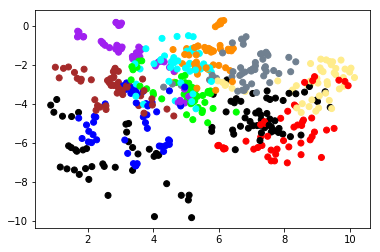

In [14]:
colors = np.array(['#000000', '#0000FF', '#A52A2A', '#A020F0', '#FF8C00', '#00FFFF',
                   '#708090', '#FFEC8B', '#000000', '#FF0000', '#00FF00'])
plt.scatter(Z0, Z1, c=colors[y_train])

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import sympy as sp

In [16]:
Y = OneHotEncoder(categories='auto').fit(np.atleast_2d(y_train).T).transform(np.atleast_2d(y_train).T).toarray()

In [17]:
#X_train.shape
#X = np.c_[np.ones(528), X_train]
#X = StandardScaler(with_std=False).fit_transform(X_train)
X = np.c_[np.ones(X_train.shape[0]), X_train]

In [18]:
Px = X @ np.linalg.inv(X.T @ X) @ X.T
# are not ordered
d, U = np.linalg.eig(Y.T @ Px @ Y)
d_ord = d[np.argsort(d)[::-1]]
U = U[:, np.argsort(d)[::-1]]
O = U
O /= np.sqrt(np.diagonal(O.T @ np.diag(priors) @ O))
B = np.linalg.lstsq(X, Y)[0]
B = B @ O

/home/andrey/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


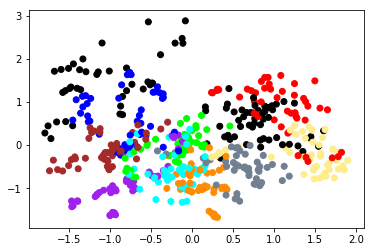

In [19]:
R = B.T @ X.T
plt.scatter(R[1], R[2], c=colors[y_train])

In [20]:
#O = np.eye(11)
#O /= np.sqrt(np.diagonal(O.T @ np.diag(priors) @ O))
#O_star = Y @ O

In [101]:
X = X_train
Xs = [sp.Symbol(f'X{i}') for i in range(10)]
#max_degree = 1 # 22(0.433)
max_degree = 2
knots = [np.unique(X[:, i]) for i in range(X.shape[1])]
X_exp = np.ones(shape=(X.shape[0], 1))
degrees = [0]
basis_functions = [1]

for e in range(20):
    best_error, best_fnc1, best_fnc2, degree = np.inf, None, None, None
    s1, s2 = None, None
    for i in range(X.shape[1]):
        Xi = X[:, i]
        for knot in knots[i]:
            if knot == knots[i][0] or knot == knots[i][-1]:
                continue
            fnc1 = np.maximum(0, Xi - knot)
            fnc2 = np.maximum(0, knot - Xi)
            for j in range(X_exp.shape[1]):
                if degrees[j] == max_degree:
                    continue
                fnc1_ = fnc1 * X_exp[:, j]
                fnc2_ = fnc2 * X_exp[:, j]
                
                X_exp_ = np.c_[X_exp, fnc1_, fnc2_]
                #B = np.linalg.lstsq(X_exp_, O_star, rcond=None)[0]
                #Sl = X_exp_ @ np.linalg.inv(X_exp_.T @ X_exp_) @ X_exp_.T
                #error = mean_squared_error(O_star, X_exp_@B)
                #error = mean_squared_error(O_star, Sl @ O_star)
                B = np.linalg.lstsq(X_exp_, Y, rcond=None)[0]
                error = mean_squared_error(Y, X_exp_@B)
                if error < best_error:
                    best_error, best_fnc1, best_fnc2 = error, fnc1_, fnc2_
                    degree = degrees[j] + 1
                    s1 = basis_functions[j]*sp.Max(0, Xs[i]-knot)
                    s2 = basis_functions[j]*sp.Max(0, knot-Xs[i])
    X_exp = np.c_[X_exp, best_fnc1, best_fnc2]
    degrees += [degree] * 2
    basis_functions += [s1, s2]
    print(f'{best_error:.3f}', s1, s2)

0.073 Max(0, X1 - 0.885) Max(0, -X1 + 0.885)
0.065 Max(0, X0 + 2.598)*Max(0, X1 - 0.885) Max(0, -X0 - 2.598)*Max(0, X1 - 0.885)
0.061 Max(0, X0 + 4.208) Max(0, -X0 - 4.208)
0.058 Max(0, X0 + 4.208)*Max(0, X1 - 0.086) Max(0, X0 + 4.208)*Max(0, -X1 + 0.086)
0.055 Max(0, X0 + 2.776)*Max(0, -X1 + 0.885) Max(0, -X0 - 2.776)*Max(0, -X1 + 0.885)
0.053 Max(0, X1 - 2.403)*Max(0, X1 - 0.885) Max(0, -X1 + 2.403)*Max(0, X1 - 0.885)
0.051 Max(0, X6 - 0.021) Max(0, -X6 + 0.021)
0.048 Max(0, X4 - 0.349)*Max(0, -X6 + 0.021) Max(0, -X4 + 0.349)*Max(0, -X6 + 0.021)
0.046 Max(0, X0 + 3.246)*Max(0, X1 - 0.885) Max(0, -X0 - 3.246)*Max(0, X1 - 0.885)
0.044 Max(0, X0 + 4.208)*Max(0, X7 - 1.249) Max(0, X0 + 4.208)*Max(0, -X7 + 1.249)
0.043 Max(0, X0 + 2.973)*Max(0, X0 + 4.208) Max(0, -X0 - 2.973)*Max(0, X0 + 4.208)
0.041 Max(0, X0 + 3.941)*Max(0, -X6 + 0.021) Max(0, -X0 - 3.941)*Max(0, -X6 + 0.021)
0.039 Max(0, X0 + 4.208)*Max(0, X8 - 0.07) Max(0, X0 + 4.208)*Max(0, -X8 + 0.07)
0.038 Max(0, X1 - 0.885)*Max(0,

In [114]:
X_exp
#X_exp = np.c_[np.ones(X_train.shape[0]), X_train]
#basis_functions = Xs

array([[1.      , 0.      , 0.467   , ..., 0.438267, 0.615075, 0.      ],
       [1.      , 0.      , 0.389   , ..., 0.424228, 0.462596, 0.      ],
       [1.      , 0.009   , 0.      , ..., 0.15525 , 0.      , 0.04239 ],
       ...,
       [1.      , 3.361   , 0.      , ..., 0.      , 0.      , 0.96702 ],
       [1.      , 4.108   , 0.      , ..., 0.      , 0.      , 0.856406],
       [1.      , 0.942   , 0.      , ..., 0.      , 0.      , 0.446208]])

/home/andrey/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


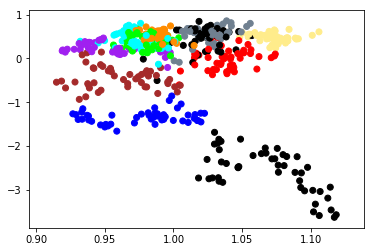

In [109]:
B = np.linalg.lstsq(X_exp, Y)[0]
d, U = np.linalg.eig(Y.T @ (X_exp @ B))
d_ord = d[np.argsort(d)[::-1]]
U = U[:, np.argsort(d)[::-1]]
#O = U[:, :2]
O = U
O /= np.sqrt(np.diagonal(O.T @ np.diag(priors) @ O))
B = B @ O
R = B.T @ X_exp.T
plt.scatter(R[0], R[1], c=colors[y_train])

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [112]:
_x_train = R[0:6].T
lda = LinearDiscriminantAnalysis().fit(_x_train, y_train)
lda_train_error = 1 - accuracy_score(y_train, lda.predict(_x_train))
lda_train_error

0.12689393939393945

In [106]:
X_test_exp = []
y_test_sel = []
for j in range(X_test.shape[0]):
    try:
        sb = {Xs[i]: X_test[j][i] for i in range(10)}
        X_test_exp.append([1]+[basis_functions[i+1].evalf(subs=sb) for i in range(len(basis_functions)-1)])
        y_test_sel.append(y_test[j])
    except:
        pass

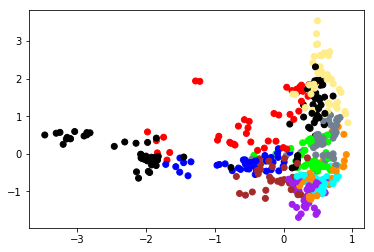

In [107]:
X_test_exp = np.array(np.vstack(X_test_exp), dtype=float)
y_test_sel = np.array(y_test_sel)
R = B.T @ X_test_exp.T
plt.scatter(R[1], R[2], c=colors[y_test_sel])

In [113]:
R = B.T @ X_test_exp.T
_x_test = R[0:6].T
lda_test_error = 1 - accuracy_score(y_test_sel, lda.predict(_x_test))
lda_test_error

0.49350649350649356